# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read

In [2]:
df = pd.read_csv("Telco_Customer_Churn.csv")

# Basic EDA

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
df.drop(columns='customerID', inplace=True)

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(22)

In [11]:
df.drop_duplicates(inplace=True)

# Advance EDA

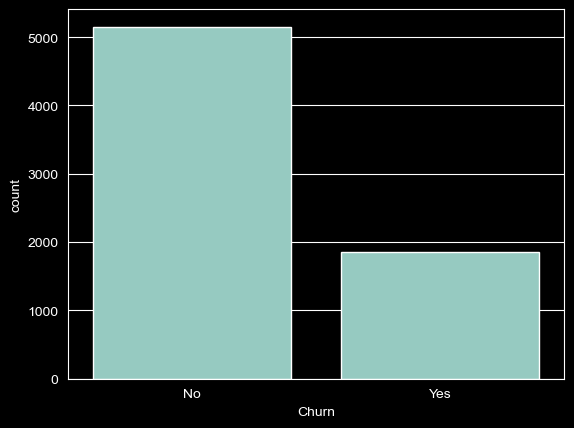

In [12]:
sns.countplot(x=df['Churn'])
plt.show()

As we in real world scenario we would be gettin less churn customers, and imbalance is of roughlt 70 30 so we will not be doing smote on it

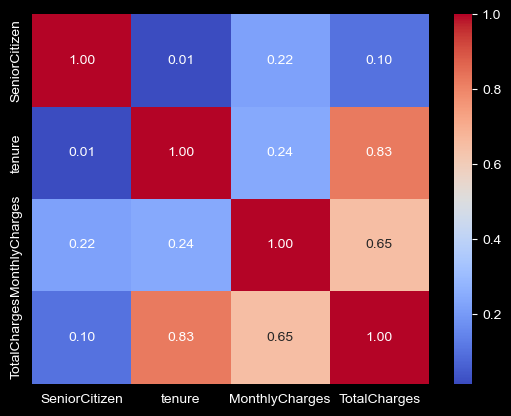

In [13]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [14]:
df['SeniorCitizen'].unique()

array([0, 1])

In [15]:
numeric_features = df.select_dtypes(include=['int64','float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns[:-1]
numeric_features, categorical_features

(Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'),
 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod'],
       dtype='object'))

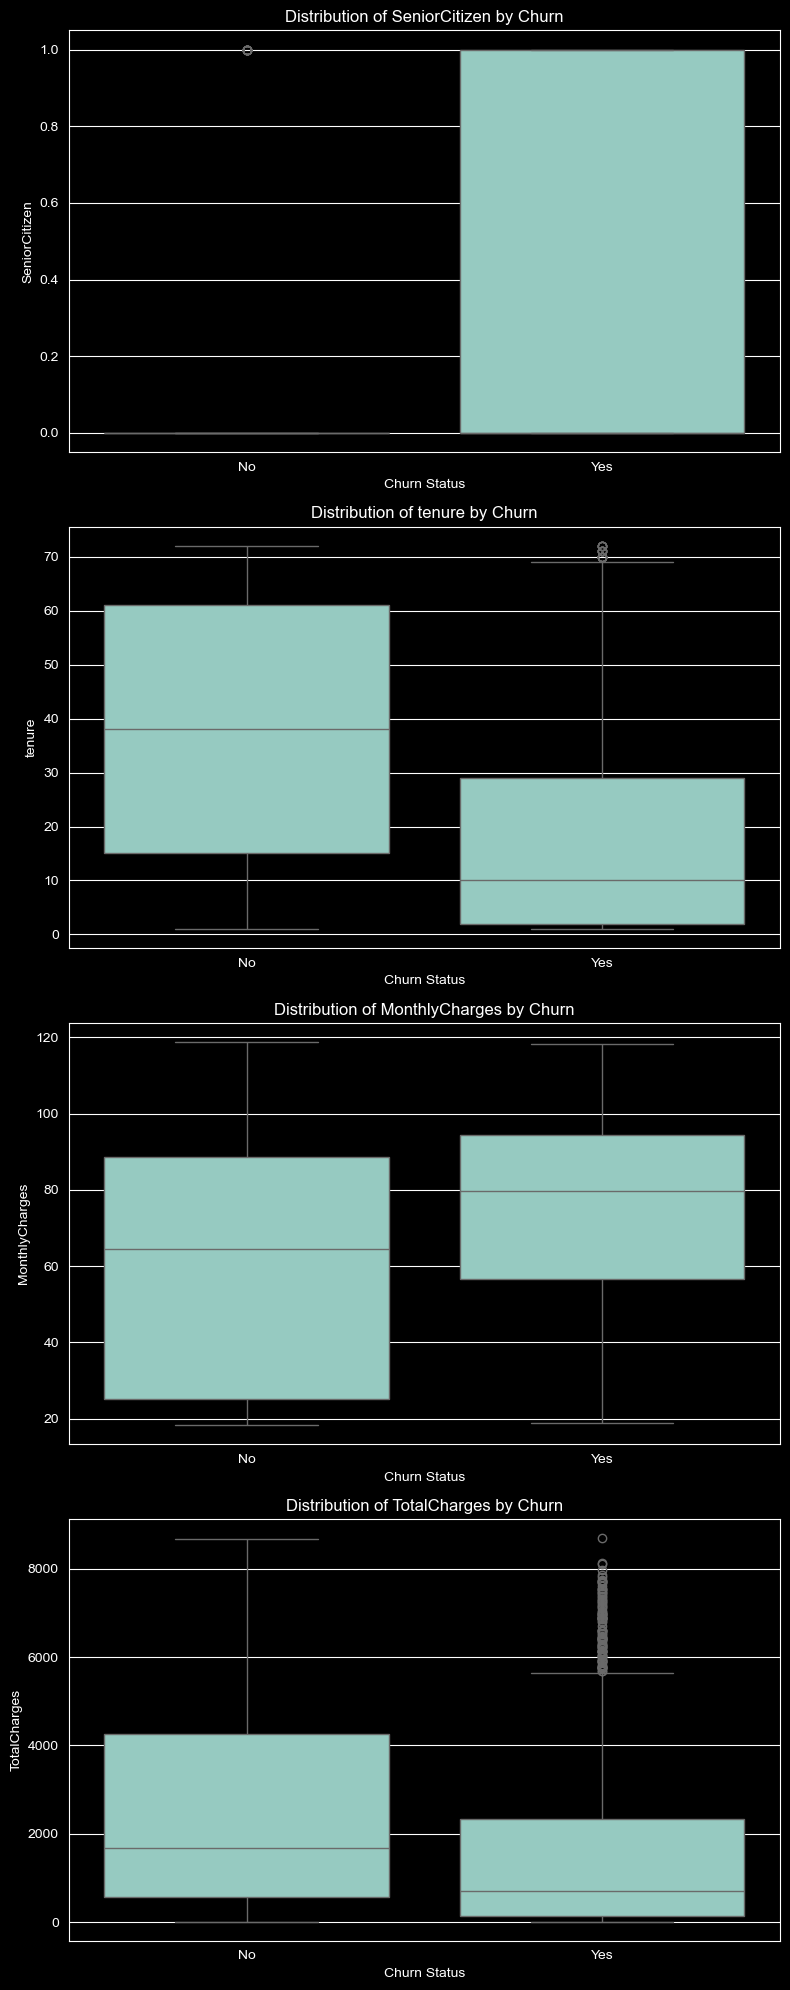

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define the figure and axes properly
# We set the height dynamically based on the number of features
fig, axes = plt.subplots(nrows=len(numeric_features), ncols=1, figsize=(8, 5 * len(numeric_features)))

# 2. If you only have 1 numeric feature, 'axes' isn't a list, so we make it one
if len(numeric_features) == 1:
    axes = [axes]

# 3. Loop through and plot
for i, col in enumerate(numeric_features):
    sns.boxplot(data=df, x='Churn', y=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Churn', fontsize=12)
    axes[i].set_xlabel('Churn Status')
    axes[i].set_ylabel(col)

# 4. Use tight_layout to prevent overlapping and show once at the end
plt.tight_layout()
plt.show()


By observation we can see that Monthly Charges have Lot of overlappping and didnt distiguish the data so it cna be drop

In [17]:
cols_to_drop = []
cols_to_drop.append('MonthlyCharges')
cols_to_drop

['MonthlyCharges']

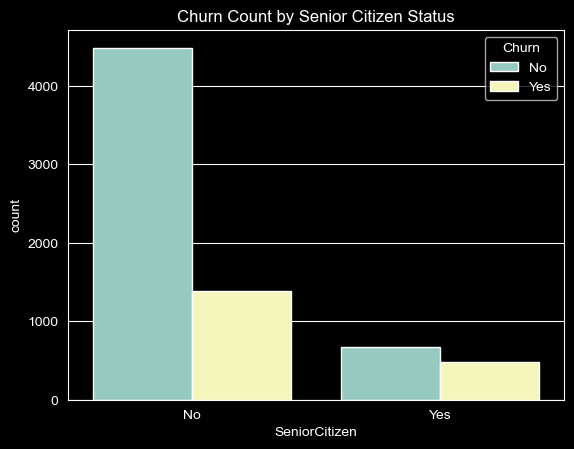

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing a 0/1 feature vs Churn
sns.countplot(x=df['SeniorCitizen'].map({0:'No',1:'Yes'}), hue=df['Churn'])
plt.title('Churn Count by Senior Citizen Status')
plt.show()

It shows that a senior citizen has much more higher chance of gettig churn

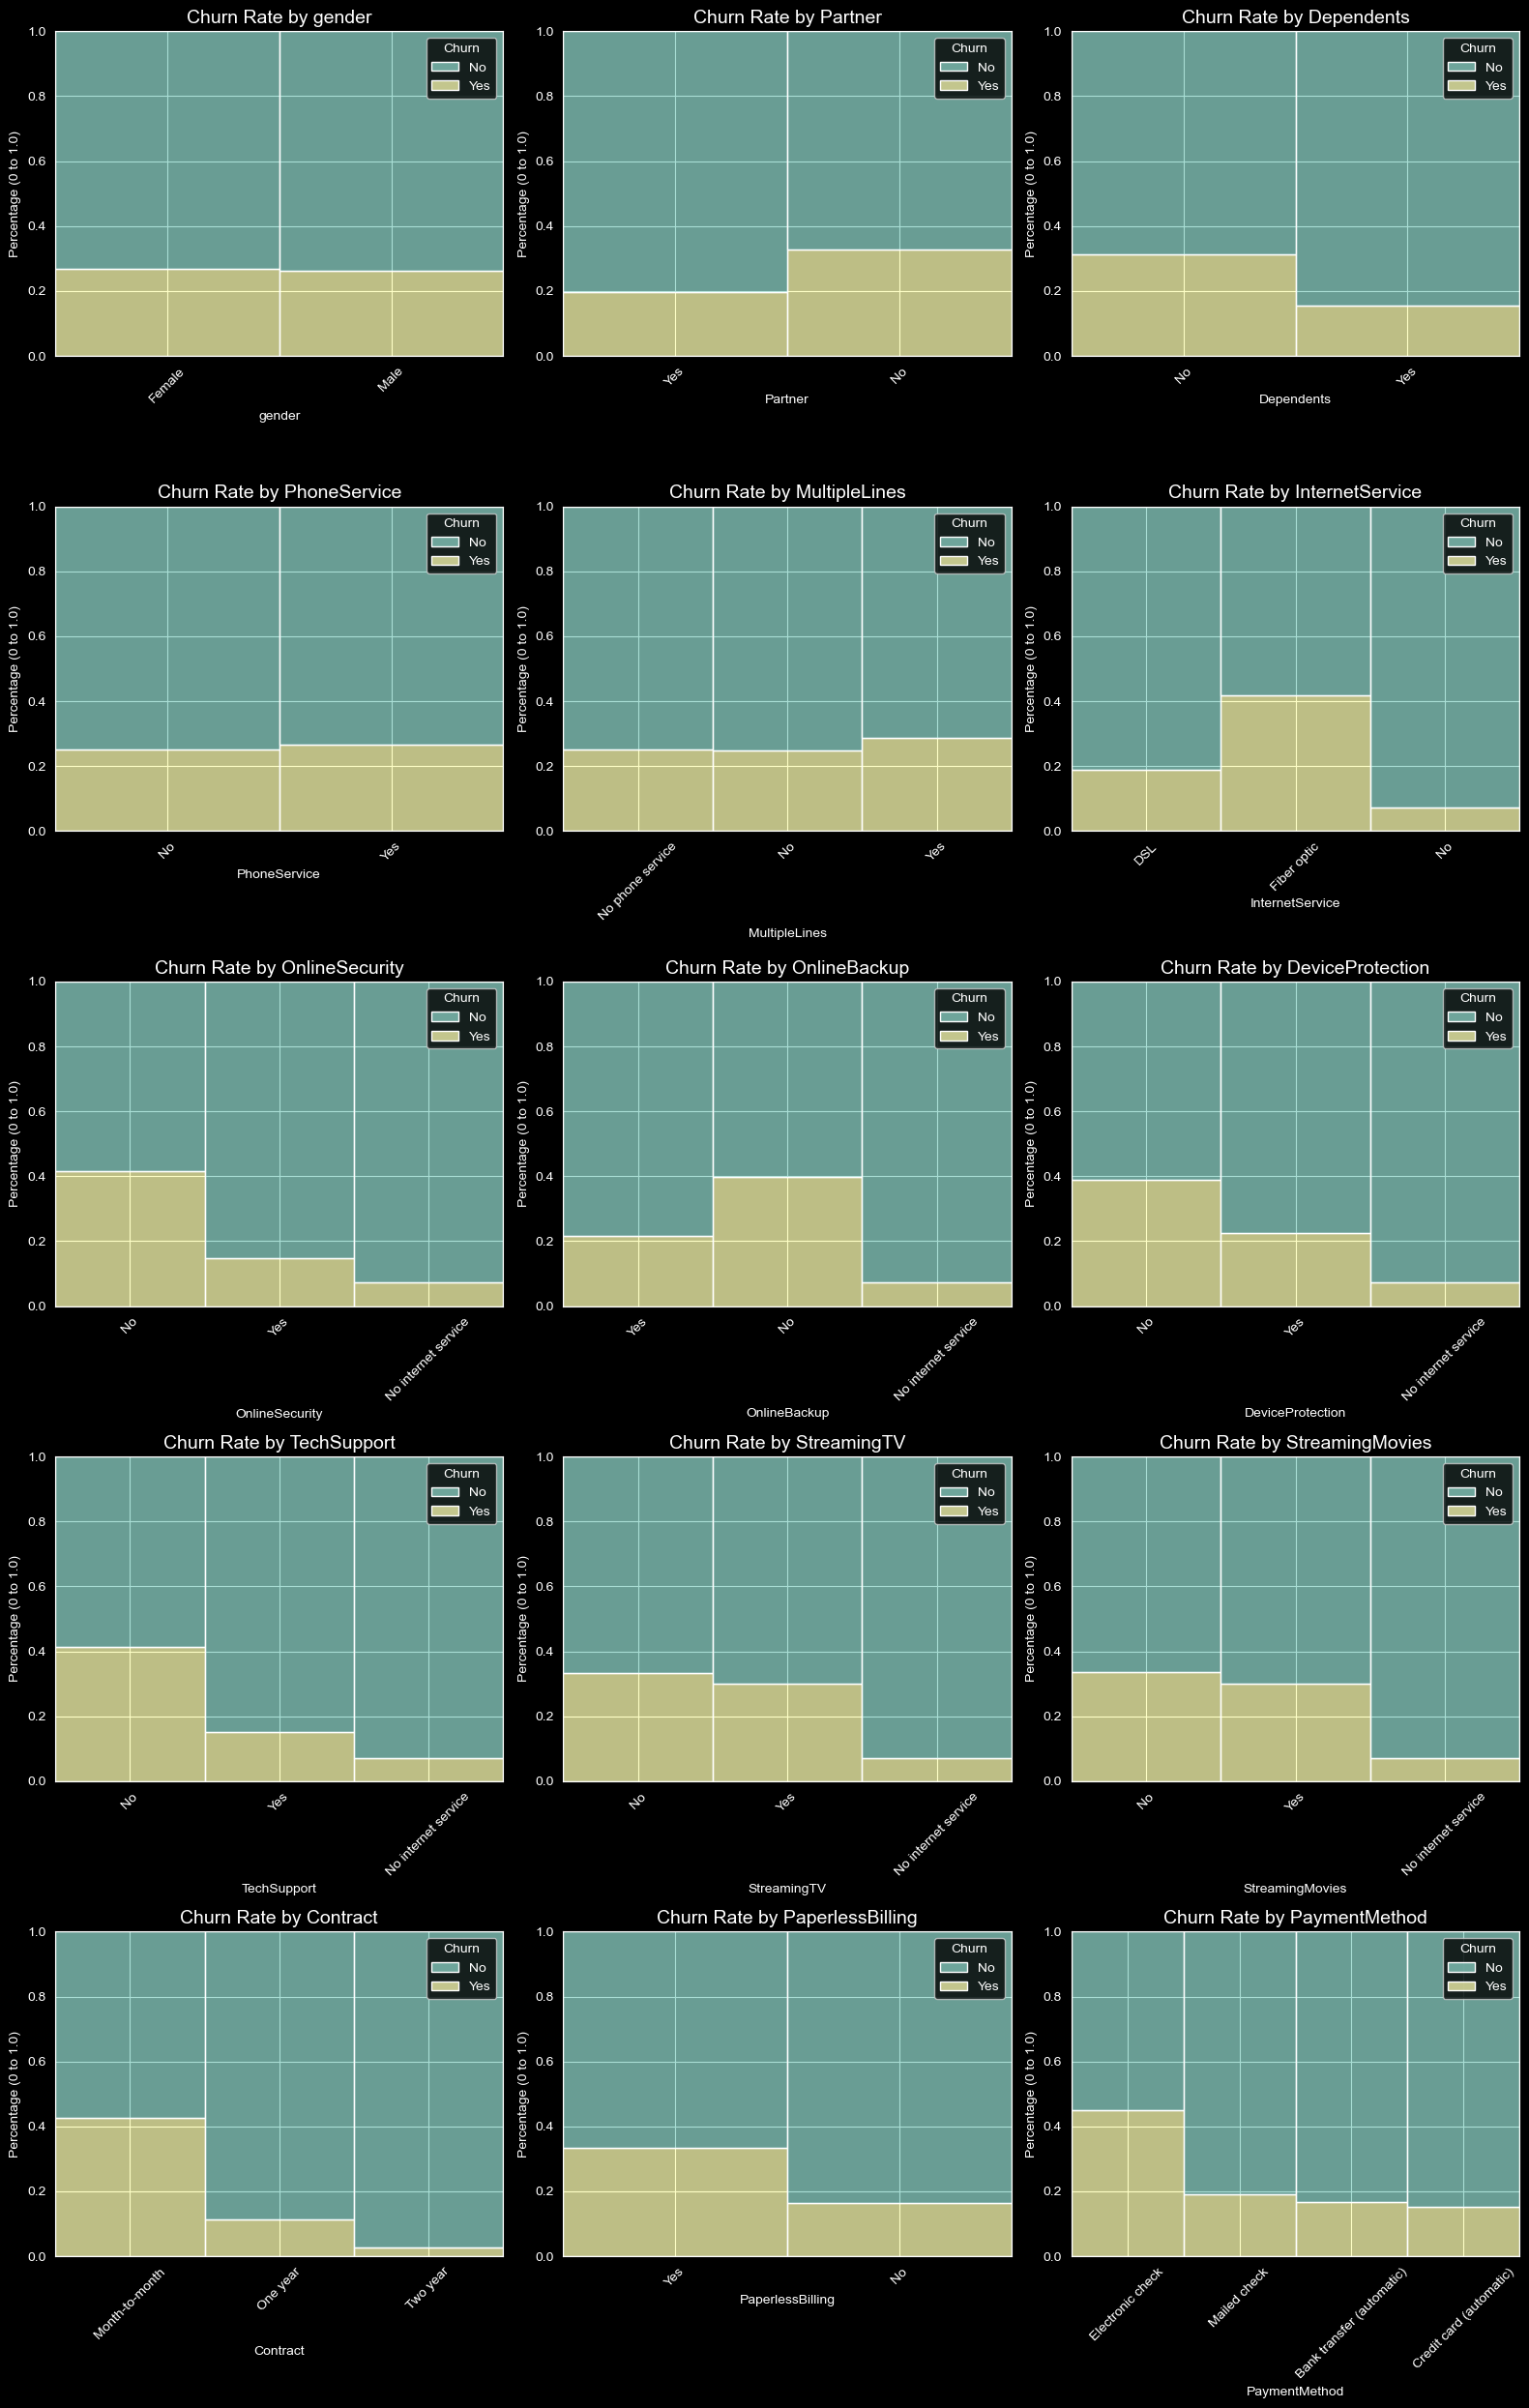

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

cols = 3
rows = math.ceil(len(categorical_features) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(16, 5 * rows))
axes_flat = axes.flatten()

for i, col in enumerate(categorical_features):
    # 'multiple="fill"' makes it a 100% stacked bar chart
    sns.histplot(data=df, x=col, hue='Churn', multiple="fill", ax=axes_flat[i])

    axes_flat[i].set_title(f'Churn Rate by {col}', fontsize=14)
    axes_flat[i].set_ylabel('Percentage (0 to 1.0)')
    axes_flat[i].tick_params(axis='x', rotation=45)

# # Hide any empty subplots
# for j in range(i + 1, len(axes_flat)):
#     axes_flat[j].set_visible(False)

plt.tight_layout()
plt.show()


as ['gender', 'PhoneService', 'MultipleLines', 'StreamingTV', 'StreamingMovies'] these features are not showing any correlation with churn prediction we will likely drop them

In [20]:
cols_to_drop += ['gender', 'PhoneService', 'MultipleLines', 'StreamingTV', 'StreamingMovies']
cols_to_drop

['MonthlyCharges',
 'gender',
 'PhoneService',
 'MultipleLines',
 'StreamingTV',
 'StreamingMovies']

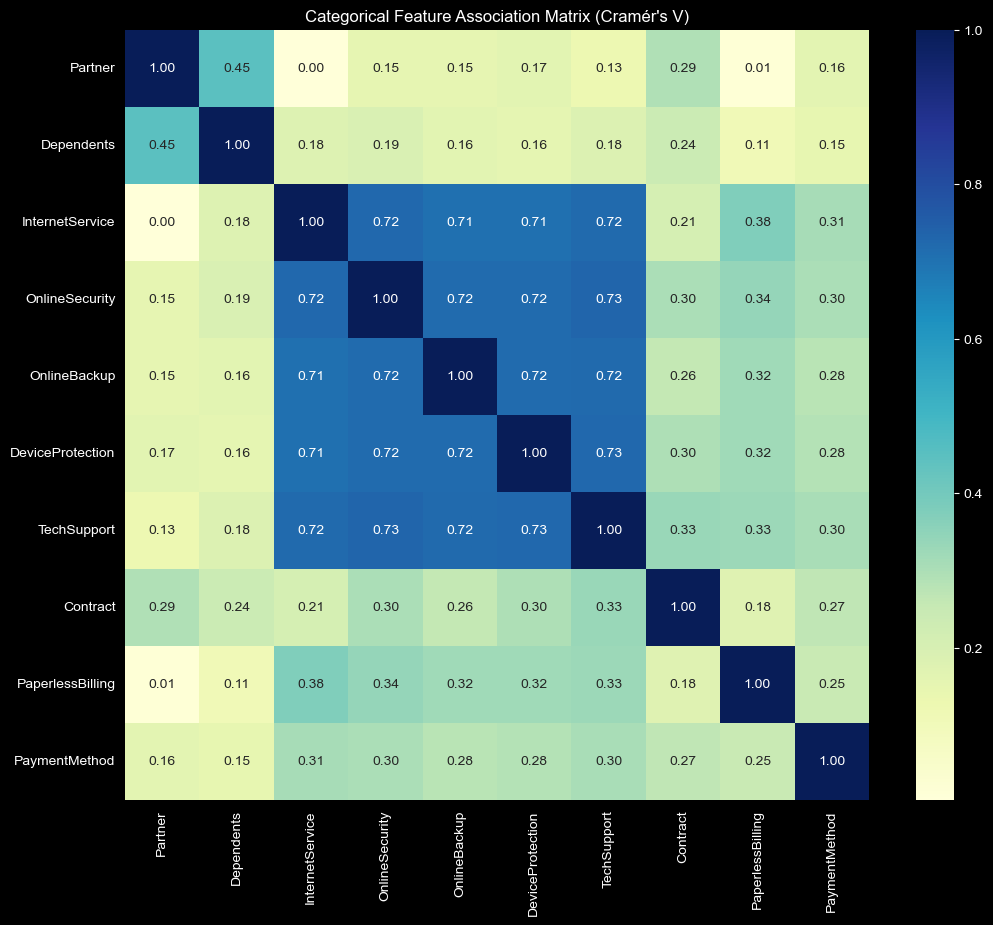

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np

def get_cramers_v_matrix(df):
    cols = df.columns
    n = len(cols)
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i == j:
                matrix[i, j] = 1.0
            else:
                # Standard Cramér's V calculation
                cm = pd.crosstab(df[cols[i]], df[cols[j]])
                chi2 = chi2_contingency(cm)[0]
                obs = cm.sum().sum()
                r, k = cm.shape
                matrix[i, j] = np.sqrt(chi2 / (obs * (min(r, k) - 1)))
    return pd.DataFrame(matrix, index=cols, columns=cols)

# Run it on your categorical features only
cv_matrix = get_cramers_v_matrix(df[categorical_features].drop(columns=cols_to_drop, errors='ignore'))

plt.figure(figsize=(12, 10))
sns.heatmap(cv_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Categorical Feature Association Matrix (Cramér\'s V)')
plt.show()


As no high correlation between categories we will likely to stick with all of these

# Skewness and Kurotsis

In [22]:
# Unbiased skewness (Normal = 0)
print("Skewness:\n")
print(df.skew(numeric_only=True))

# Excess kurtosis (Fisher’s definition: Normal = 0)
print("\nKurtosis:\n")
print(df.kurtosis(numeric_only=True))


Skewness:

SeniorCitizen     1.827450
tenure            0.233740
MonthlyCharges   -0.225686
TotalCharges      0.958322
dtype: float64

Kurtosis:

SeniorCitizen     1.339956
tenure           -1.388526
MonthlyCharges   -1.252843
TotalCharges     -0.238373
dtype: float64


As SeniorCitizen is a categorical data it is not skewed

Note: If your Kurtosis is very high (e.g., > 3 or 5), your model might be overly influenced by a few extreme outliers.

Skewness Value	Interpretation	Action Needed?
-0.5 to 0.5	Symmetrical	No action needed.
0.5 to 1.0 (or -0.5 to -1.0)	Moderately Skewed	Optional (consider Square Root transform).
> 1.0 (or < -1.0)	Highly Skewed	Yes. Apply Log or Box-Cox transformation.

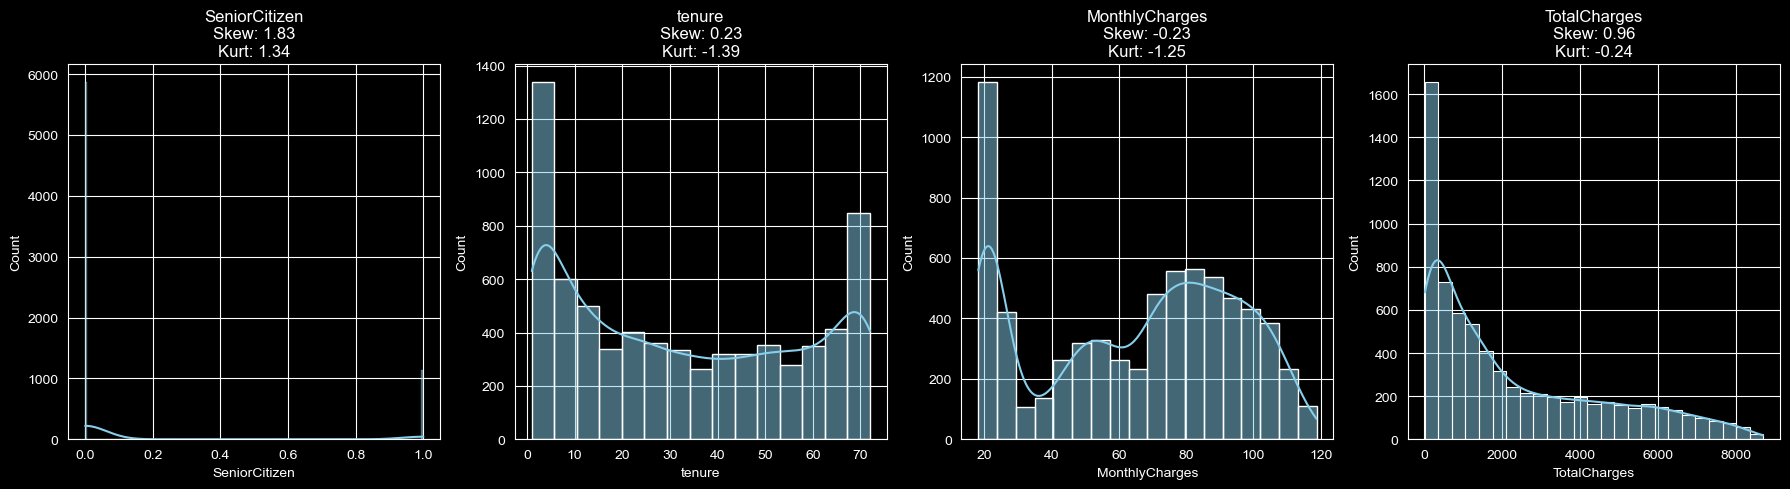

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create distribution plots
fig, axes = plt.subplots(1, len(numeric_features), figsize=(18, 5))

for i, col in enumerate(numeric_features):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{col}\nSkew: {df[col].skew():.2f}\nKurt: {df[col].kurt():.2f}')

plt.tight_layout()
plt.show()


# Feature Engineering

We will be removing the featues which we have decided during the advance eda

In [24]:
df_filtered = df.drop(columns=cols_to_drop)
df_filtered.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,Yes,No,1,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,0,No,No,34,DSL,Yes,No,Yes,No,One year,No,Mailed check,1889.50,No
2,0,No,No,2,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,0,No,No,45,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),1840.75,No
4,0,No,No,2,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


## One Hot Encoding

In [25]:
df_filtered['Churn'] = df_filtered['Churn'].map({'No':0, 'Yes':1})

df_dummies = pd.get_dummies(df_filtered, drop_first=True)
df_dummies.head()

,SeniorCitizen,tenure,TotalCharges,Churn,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,0,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,1889.50,0,False,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
2,0,2,108.15,1,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,0,45,1840.75,0,False,False,False,False,False,True,...,False,True,False,True,True,False,False,False,False,False
4,0,2,151.65,1,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [26]:
len(df_filtered.columns), len(df_dummies.columns)

(14, 22)

In [34]:
df_filtered['TotalCharges'].mean()

np.float64(2290.3533880171185)

In [28]:
df_dummies.columns

Index(['SeniorCitizen', 'tenure', 'TotalCharges', 'Churn', 'Partner_Yes',
       'Dependents_Yes', 'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

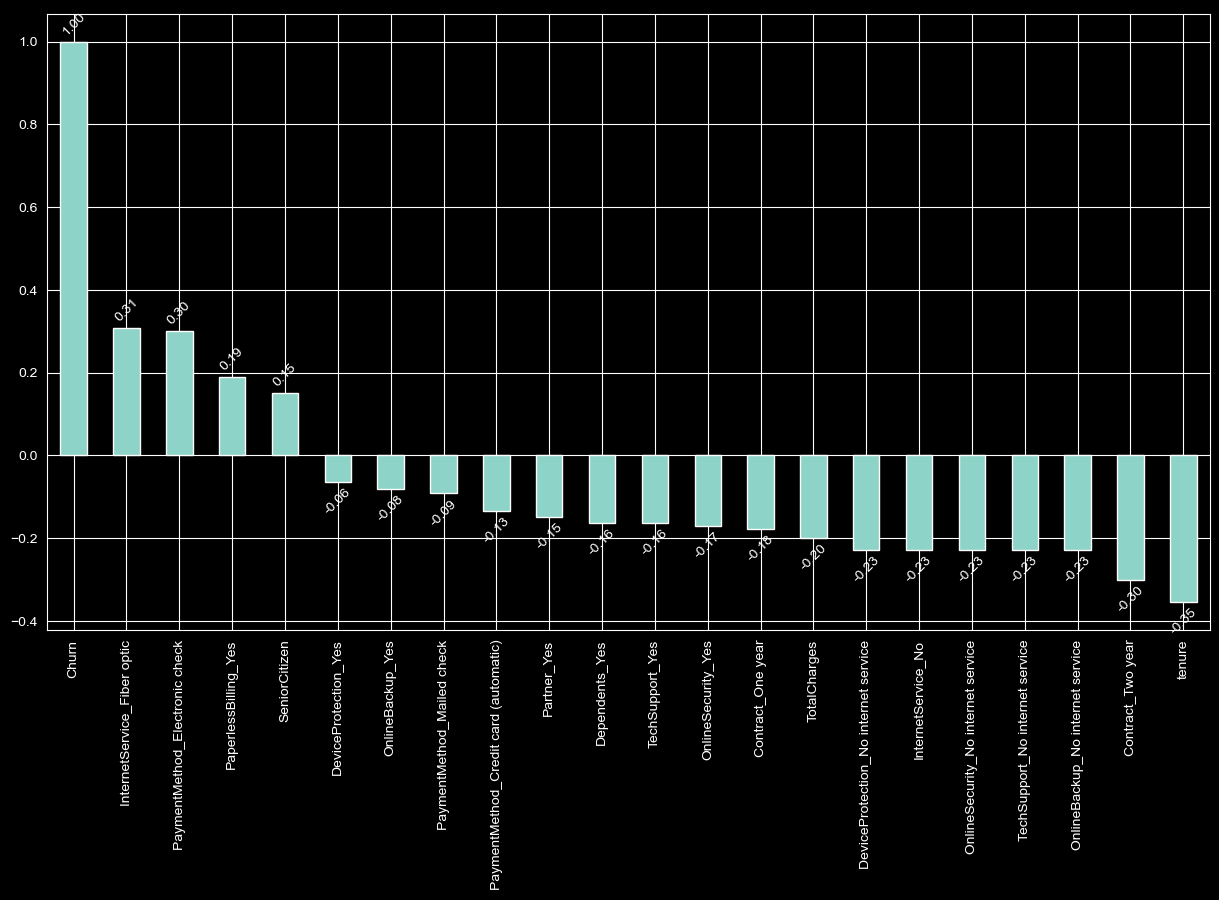

In [27]:
plt.figure(figsize=(15,8))
ax = df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

for container in ax.containers:
  ax.bar_label(container, fmt='%.2f', padding=3, rotation=45)

DeviceProtection adn OnlineBackup shows poor correlation
As i have not run the chi-squared test (if i have a p-value greater than 0.05 then i would have dropped this) we will be keeping the freatures (as well with our given set of data these many no. of features will likely not cause overfittling).

# Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

X = df_dummies.drop('Churn', axis=1)
y = df_dummies['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalization

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [30]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train_scaled.head()

,SeniorCitizen,tenure,TotalCharges,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.309859,0.138790,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.014085,0.010368,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.549296,0.157408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.014085,0.017776,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.014085,0.016922,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


Saving the scaler for future use

In [31]:
import joblib

scaler_path = "minmax_scaler.joblib"

joblib.dump(scaler, scaler_path)

['minmax_scaler.joblib']

Saving all this step in aa file which will come handy when creating the aapp around thiss

In [32]:
%%writefile feature_engineering.py

import pandas as pd

cols_to_drop = ['MonthlyCharges',
 'gender',
 'PhoneService',
 'MultipleLines',
 'StreamingTV',
 'StreamingMovies']

def feature_engineering(df, scaler):
  df = df.drop(columns=cols_to_drop, errors='ignore')

  df = pd.get_dummies(df, drop_first=True)

  df = pd.DataFrame(scaler.transform(df), columns=df.columns)

  return df

Writing feature_engineering.py


# Comparing different Models

In [33]:
model_result = {}

## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [35]:
from sklearn import metrics
prediction_test = model.predict(X_test_scaled)

# Print the prediction accuracy

accuracy = metrics.accuracy_score(y_test, prediction_test)
print(accuracy)

0.8238231098430813


In [36]:
model_result[model] = accuracy

Axes(0.125,0.11;0.775x0.77)


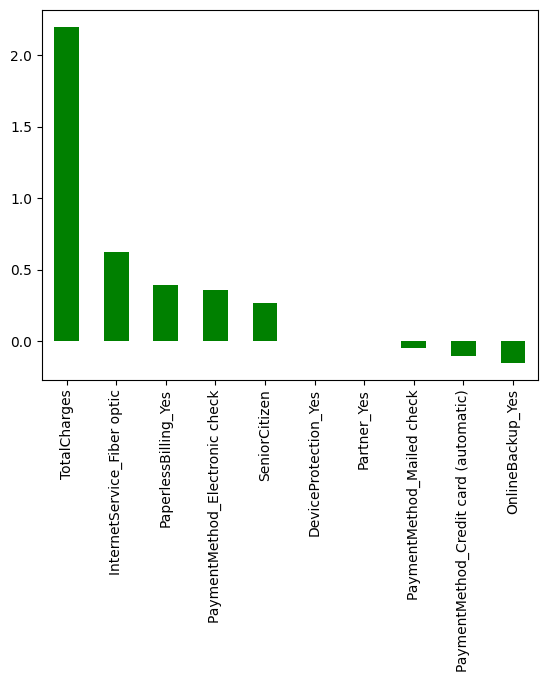

In [37]:

# To get the weights of all the variables

weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar', color = 'green'))

Axes(0.125,0.11;0.775x0.77)


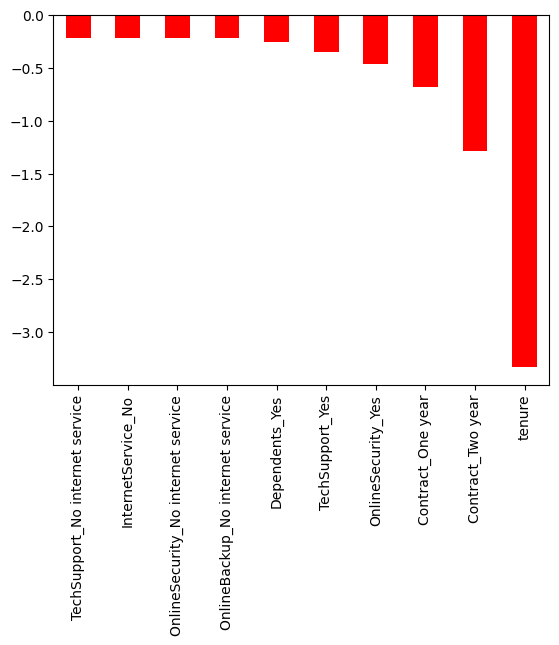

In [ ]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar', color = 'red'))


## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [40]:
# Make predictions

prediction_test = model.predict(X_test_scaled)
accuracy = metrics.accuracy_score(y_test, prediction_test)
print(accuracy)

0.7796005706134094


In [41]:
model_result[model] = accuracy
model_result

{LogisticRegression(random_state=42): 0.8238231098430813,
 RandomForestClassifier(random_state=42): 0.7796005706134094}

## SVM

In [42]:
from sklearn.svm import SVC

model = SVC(kernel='linear', random_state=42)
model.fit(X_train_scaled,y_train)
preds = model.predict(X_test_scaled)
accuracy = metrics.accuracy_score(y_test, preds)

In [43]:
accuracy

0.8231098430813124

In [44]:
model_result[model] = accuracy
model_result

{LogisticRegression(random_state=42): 0.8238231098430813,
 RandomForestClassifier(random_state=42): 0.7796005706134094,
 SVC(kernel='linear', random_state=42): 0.8231098430813124}

In [45]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,preds))

[[980 101]
 [147 174]]


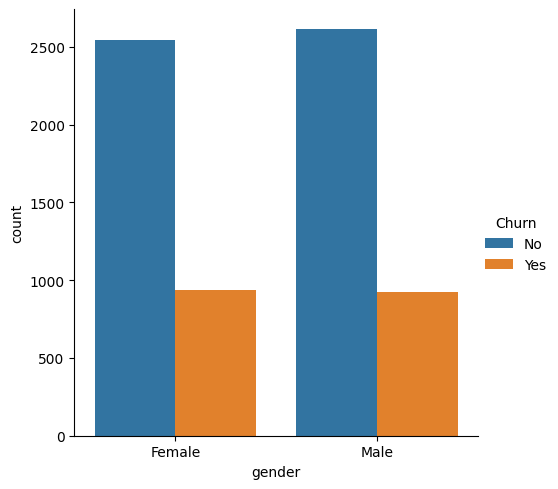

In [46]:
ax1 = sns.catplot(x="gender", kind="count", hue="Churn", data=df,
                  estimator=lambda x: sum(x==0)*100.0/len(x))

## ADABoost

In [47]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=42)
# n_estimators = 50 (default value)
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, preds)
accuracy

0.8138373751783167

In [48]:
model_result[model] = accuracy
model_result

{LogisticRegression(random_state=42): 0.8238231098430813,
 RandomForestClassifier(random_state=42): 0.7796005706134094,
 SVC(kernel='linear', random_state=42): 0.8231098430813124,
 AdaBoostClassifier(random_state=42): 0.8138373751783167}

## XGBoost

In [49]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, preds)
accuracy

0.7952924393723253

In [50]:
model_result[model] = accuracy
model_result

{LogisticRegression(random_state=42): 0.8238231098430813,
 RandomForestClassifier(random_state=42): 0.7796005706134094,
 SVC(kernel='linear', random_state=42): 0.8231098430813124,
 AdaBoostClassifier(random_state=42): 0.8138373751783167,
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=None,
               n_jobs=None, num_parallel_tree=N

In [51]:
# 1. Find the model object with the maximum value
best_model = max(model_result, key=model_result.get)

# 2. Get the corresponding score
best_score = model_result[best_model]

print(f"The best model is: {best_model}")
print(f"Highest Accuracy: {best_score:.4f}")


The best model is: LogisticRegression(random_state=42)
Highest Accuracy: 0.8238


As Ligostic Regression is performing best bust SVC is also shows good results we will do a random cv on it

# Hyperparameter Tuning

In [52]:
from scipy.stats import reciprocal, uniform
import numpy as np

param_grid = {
    # C: Controls regularization. We search from 0.1 to 1000 using a log-scale distribution.
    'C': reciprocal(0.1, 1000),

    # gamma: Controls the influence of individual points.
    # 'scale' and 'auto' are standard defaults; reciprocal covers a wide range.
    'gamma': ['scale', 'auto'] + list(np.logspace(-4, 1, 20)),

    # kernel: We test different ways of drawing the decision boundary.
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],

    # degree: Only used by the 'poly' kernel.
    'degree': [2, 3, 4, 5],

    # class_weight: Highly recommended for your imbalanced (73/27) Churn data.
    'class_weight': [None, 'balanced']
}

In [53]:
from sklearn.model_selection import RandomizedSearchCV

model = SVC(random_state=42)

svc_random = RandomizedSearchCV(
    estimator = model,
    param_distributions= param_grid,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='accuracy'
)


svc_random.fit(X_train_scaled, y_train)

print("Best Parameters found:", svc_random.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters found: {'C': np.float64(1.4618962793704957), 'class_weight': None, 'degree': 4, 'gamma': np.float64(0.0069519279617756054), 'kernel': 'sigmoid'}


In [54]:
best_svc = SVC(random_state=42,**svc_random.best_params_)

best_svc.fit(X_train_scaled, y_train)
y_preds = best_svc.predict(X_test_scaled)
print(f"Accuracy of best RF Model: {metrics.accuracy_score(y_test, y_preds)}")

Accuracy of best RF Model: 0.8166904422253923


In [55]:
model_result[best_svc] = metrics.accuracy_score(y_test, y_preds)
model_result

{LogisticRegression(random_state=42): 0.8238231098430813,
 RandomForestClassifier(random_state=42): 0.7796005706134094,
 SVC(kernel='linear', random_state=42): 0.8231098430813124,
 AdaBoostClassifier(random_state=42): 0.8138373751783167,
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=None,
               n_jobs=None, num_parallel_tree=N

# Save The Base

In [56]:
# 1. Find the model object with the maximum value
best_model = max(model_result, key=model_result.get)

# 2. Get the corresponding score
best_score = model_result[best_model]

print(f"The best model is: {best_model}")
print(f"Highest Accuracy: {best_score:.4f}")


The best model is: LogisticRegression(random_state=42)
Highest Accuracy: 0.8238


In [58]:
best_model_path = "logistic_regression.pkl"
joblib.dump(best_model, best_model_path)

['logistic_regression.pkl']

#